In [11]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from census import Census
import scipy.stats as stats

# Import census key and set to year 2016

c = Census("85ac64b6b5a9c0901b00329d1ef41f0c53ccfc98", year=2016)


In [12]:
# Run Census Search to retrieve data on by states
census_data = c.acs5.get(("NAME", "B01003_001E", "B17001_002E", "B15003_002E","B15003_002E", 
                          "B15003_017E", "B15003_018E", "B15003_021E", "B15003_022E", "B15003_023E", 
                          "B15003_024E", "B15003_025E", "B25077_001E", "B19013_001E"), {'for': 'state:*'})
# Create datafram
census_df = pd.DataFrame(census_data)

# Relabel and Reorder Columns
census_df = census_df.rename(columns={"state": "State",
                                      "NAME": "Name",
                                      "B01003_001E": "Population",
                                      "B17001_002E": "Poverty Count",
                                      "B15003_002E": "No Education", 
                                      "B15003_017E": "High School Education", 
                                      "B15003_018E": "GED Education",
                                      "B15003_021E": "Associates Degree",
                                      "B15003_022E": "Bachelors Degree", 
                                      "B15003_023E": "Masters Degree",
                                      "B15003_024E": "Professional Degree",
                                      "B15003_025E": "Doctoral Degree",
                                      "B25077_001E": "Median Home Value",
                                      "B19013_001E": "Household Income"
                                      })

census_df = census_df.reindex(columns=["Name", "Population", "Poverty Count",  "No Education", "High School Education", 
                                       "GED Education", "Associates Degree", "Bachelors Degree" , "Masters Degree", 
                                       "Professional Degree", "Doctoral Degree","Median Home Value","Household Income"])

# Print
census_df.head()



,Name,Population,Poverty Count,No Education,High School Education,GED Education,Associates Degree,Bachelors Degree,Masters Degree,Professional Degree,Doctoral Degree,Median Home Value,Household Income
0,Alabama,4841164.0,868666.0,42577.0,828205.0,181388.0,258502.0,492382.0,208839.0,49283.0,32572.0,128500.0,44758.0
1,Alaska,736855.0,72826.0,3020.0,106169.0,24342.0,39133.0,86551.0,35423.0,8522.0,5029.0,257100.0,74444.0
2,Arizona,6728577.0,1165636.0,62538.0,898657.0,179701.0,379207.0,777681.0,333226.0,76987.0,53531.0,176900.0,51340.0
3,Arkansas,2968472.0,542431.0,23010.0,561132.0,122754.0,127004.0,273557.0,108055.0,24517.0,18317.0,114700.0,42336.0
4,California,38654206.0,6004257.0,673089.0,4678279.0,582625.0,1995579.0,5136043.0,2045487.0,597874.0,397083.0,409300.0,63783.0


In [13]:

# Create Poverty Rate (Poverty Count / Population)
census_df["Poverty Rate"] = 100 * census_df["Poverty Count"].astype(int) / census_df["Population"].astype(int)

# Create No Degree column
census_df["No Degree"] = census_df["No Education"] + census_df["High School Education"] + census_df["GED Education"]

# Create Degree column
census_df["Degree"] = census_df["Associates Degree"] + census_df["Bachelors Degree"] + census_df["Masters Degree"] \
                    + census_df["Professional Degree"] + census_df["Doctoral Degree"]

# All columns needed for data by state saved to .csv in case needed
census_df.to_csv("Census_by_state_all.csv", index=False)

# Print
census_df.head()


,Name,Population,Poverty Count,No Education,High School Education,GED Education,Associates Degree,Bachelors Degree,Masters Degree,Professional Degree,Doctoral Degree,Median Home Value,Household Income,Poverty Rate,No Degree,Degree
0,Alabama,4841164.0,868666.0,42577.0,828205.0,181388.0,258502.0,492382.0,208839.0,49283.0,32572.0,128500.0,44758.0,17.943329,1052170.0,1041578.0
1,Alaska,736855.0,72826.0,3020.0,106169.0,24342.0,39133.0,86551.0,35423.0,8522.0,5029.0,257100.0,74444.0,9.883356,133531.0,174658.0
2,Arizona,6728577.0,1165636.0,62538.0,898657.0,179701.0,379207.0,777681.0,333226.0,76987.0,53531.0,176900.0,51340.0,17.323663,1140896.0,1620632.0
3,Arkansas,2968472.0,542431.0,23010.0,561132.0,122754.0,127004.0,273557.0,108055.0,24517.0,18317.0,114700.0,42336.0,18.273071,706896.0,551450.0
4,California,38654206.0,6004257.0,673089.0,4678279.0,582625.0,1995579.0,5136043.0,2045487.0,597874.0,397083.0,409300.0,63783.0,15.533257,5933993.0,10172066.0


In [14]:
# Only use necessary columns
census_df = census_df.reindex(columns=["Name", "Population", "Poverty Rate", "No Degree", "Degree", "Median Home Value","Household Income"])

# Add No Degree %
census_df["No Degree %"] = census_df["No Degree"] / (census_df["No Degree"] + census_df["Degree"])
census_df["No Degree %"] = round(census_df["No Degree %"]*100,2)

# Add Degree %
census_df["Degree %"] = census_df["Degree"] / (census_df["No Degree"] + census_df["Degree"])
census_df["Degree %"] = round(census_df["Degree %"]*100,2)
census_df.head()

,Name,Population,Poverty Rate,No Degree,Degree,Median Home Value,Household Income,No Degree %,Degree %
0,Alabama,4841164.0,17.943329,1052170.0,1041578.0,128500.0,44758.0,50.25,49.75
1,Alaska,736855.0,9.883356,133531.0,174658.0,257100.0,74444.0,43.33,56.67
2,Arizona,6728577.0,17.323663,1140896.0,1620632.0,176900.0,51340.0,41.31,58.69
3,Arkansas,2968472.0,18.273071,706896.0,551450.0,114700.0,42336.0,56.18,43.82
4,California,38654206.0,15.533257,5933993.0,10172066.0,409300.0,63783.0,36.84,63.16


(-1.1197636229079588,
 1.1122679192491973,
 -1.121586353242404,
 1.1117241728553344)

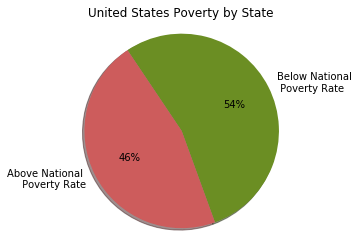

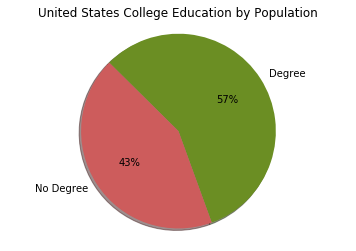

In [15]:
# Create national poverty average
poverty_avg = census_df["Poverty Rate"].mean()

# States above the poverty average
states_above_pov_avg = census_df.loc[census_df["Poverty Rate"] > poverty_avg]
average_home_value_above = states_above_pov_avg["Median Home Value"].mean()

# States below the poverty average
states_below_pov_avg = census_df.loc[census_df["Poverty Rate"] < poverty_avg]
average_home_value_below = states_below_pov_avg["Median Home Value"].mean()

# Count of states above povery average
above_pov_count = states_above_pov_avg["Name"].count()

# Count of states above povery average
below_pov_count = states_below_pov_avg["Name"].count()

# Create pie chart showing above and below poverty rate
plt.figure(0)
sizes = [below_pov_count, above_pov_count]
labels = ['Below National \n Poverty Rate', 'Above National \n Poverty Rate']
colors = ['olivedrab', 'indianred']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.f%%', shadow=True, startangle=290)
plt.title('United States Poverty by State')
plt.axis('equal')

# Total US population with degrees
total_degrees = census_df["Degree"].sum()

# Total US population without degrees
total_no_degrees = census_df["No Degree"].sum()

# Create pie chart showing population with no degrees and degrees
plt.figure(1)
sizes = [total_degrees, total_no_degrees]
labels = ['Degree', 'No Degree']
colors = ['olivedrab', 'indianred']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.f%%', shadow=True, startangle=290)
plt.title('United States College Education by Population')
plt.axis('equal')


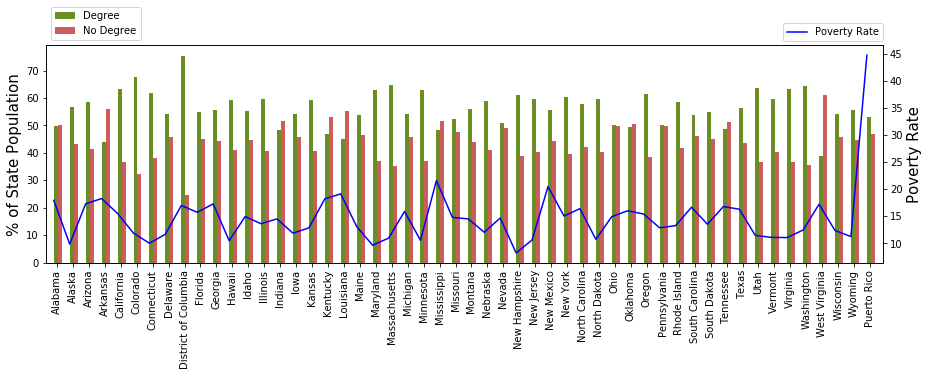

In [16]:
# Create bar charts of degree and no degree per state of % of population 
colors = ['olivedrab', 'indianred']
labels = ["Degree" , "No Degree"]
ax1 = census_df.plot.bar(x="Name", y=["Degree %", "No Degree %"], figsize=(15,4), color=colors, align='edge', label=labels)

# Add secondary y axis line chart for poverty
ax2 = census_df.plot.line(x="Name", y="Poverty Rate", color='b', rot=90, ax=ax1, secondary_y=True)

# Clean up and label chart
plt.xticks(np.arange(len(census_df["Name"]))+0.2, census_df["Name"])
plt.xlim(-.5, len(census_df["Name"]))
ax1.legend(loc='center', bbox_to_anchor=(.06, 1.1), ncol=1)
ax2.legend(loc='center', bbox_to_anchor=(.94, 1.06), ncol=1)
ax1.set_xlabel("")
ax1.set_ylabel('% of State Population', fontsize=15)
ax2.set_ylabel('Poverty Rate', fontsize=15)

# Show plot
plt.show()

In [17]:
census_df = census_df.sort_values("Median Home Value",ascending = False)
census_df.head()

,Name,Population,Poverty Rate,No Degree,Degree,Median Home Value,Household Income,No Degree %,Degree %
11,Hawaii,1413673.0,10.509998,281020.0,406191.0,538400.0,71977.0,40.89,59.11
8,District of Columbia,659009.0,17.004320,88371.0,270812.0,506100.0,72935.0,24.60,75.40
4,California,38654206.0,15.533257,5933993.0,10172066.0,409300.0,63783.0,36.84,63.16
21,Massachusetts,6742143.0,10.988138,1231273.0,2276580.0,341000.0,70954.0,35.10,64.90
30,New Jersey,8915456.0,10.648261,1805722.0,2680713.0,316400.0,73702.0,40.25,59.75


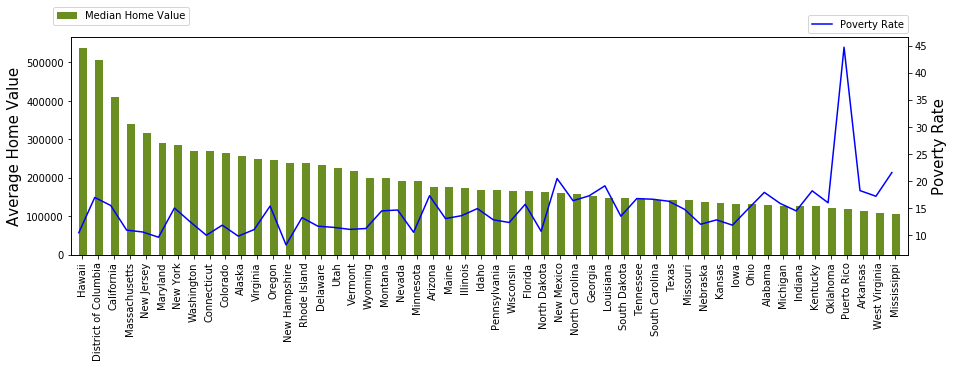

In [18]:

# Show plot
ax1 = census_df.plot.bar(x="Name", y=["Median Home Value"], figsize=(15,4), color=colors, align='edge')
ax2 = census_df.plot.line(x="Name", y="Poverty Rate", color='b', rot=90, ax=ax1, secondary_y=True)
plt.xticks(np.arange(len(census_df["Name"]))+0.2, census_df["Name"])
plt.xlim(-.5, len(census_df["Name"]))
ax1.legend(loc='center', bbox_to_anchor=(.06, 1.1), ncol=1)
ax2.legend(loc='center', bbox_to_anchor=(.94, 1.06), ncol=1)
ax1.set_xlabel("")
ax1.set_ylabel('Average Home Value', fontsize=15)
ax2.set_ylabel('Poverty Rate', fontsize=15)

plt.show()


In [24]:
stats.chisquare(census_df['Median Home Value'], census_df['Poverty Rate'])

Power_divergenceResult(statistic=201110424721.9053, pvalue=0.0)

Text(0, 0.5, 'Household Income')

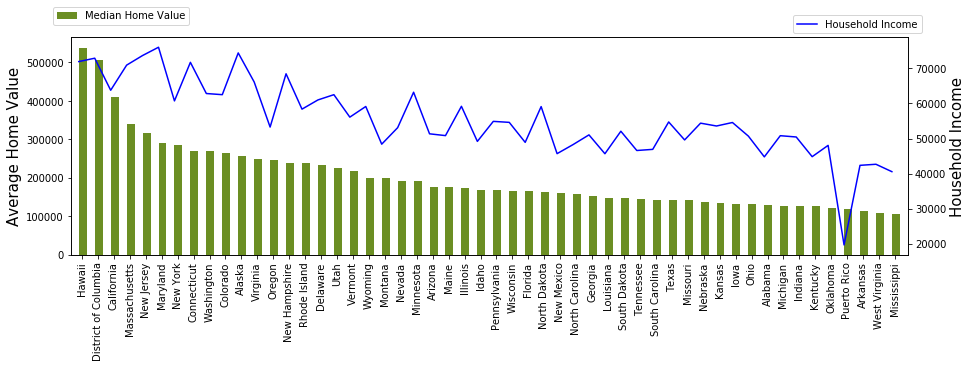

In [97]:
ax1 = census_df.plot.bar(x="Name", y=["Median Home Value"], figsize=(15,4), color=colors, align='edge')
ax2 = census_df.plot.line(x="Name", y="Household Income", color='b', rot=90, ax=ax1, secondary_y=True)
plt.xticks(np.arange(len(census_df["Name"]))+0.2, census_df["Name"])
plt.xlim(-.5, len(census_df["Name"]))
ax1.legend(loc='center', bbox_to_anchor=(.06, 1.1), ncol=1)
ax2.legend(loc='center', bbox_to_anchor=(.94, 1.06), ncol=1)
ax1.set_xlabel("")
ax1.set_ylabel('Average Home Value', fontsize=15)
ax2.set_ylabel('Household Income', fontsize=15)




In [25]:
stats.chisquare(census_df['Poverty Rate'], census_df['Household Income'])

Power_divergenceResult(statistic=2875658.701302874, pvalue=0.0)